---

## 🧮 `pandas` — Data Analysis and Manipulation

**Import Syntax**:
```python
import pandas as pd
```

**Description**:  
`pandas` is a powerful, flexible library for data manipulation and analysis. It provides two primary data structures — `Series` (1D) and `DataFrame` (2D) — to handle labeled and relational data efficiently. It is extensively used for data wrangling, cleaning, merging, and time-series analysis.

---

## 🔢 `numpy` — Numerical Computing

**Import Syntax**:
```python
import numpy as np
```

**Description**:  
`numpy` is the fundamental package for scientific computing with Python. It supports large, multi-dimensional arrays and matrices, along with a vast library of mathematical functions to operate on these arrays efficiently. It is the foundation for many other scientific libraries.

---

## 📊 `matplotlib.pyplot` — Visualization

**Import Syntax**:
```python
import matplotlib.pyplot as plt
```

**Description**:  
`matplotlib.pyplot` is a collection of functions that make matplotlib work like MATLAB. It provides a MATLAB-like plotting framework for creating static, animated, and interactive plots in Python. Common uses include visualizing trends, distributions, and relationships in data.

---

## 🎨 `seaborn` — Statistical Data Visualization

**Import Syntax**:
```python
import seaborn as sns
```

**Description**:  
`seaborn` is a high-level interface for drawing attractive and informative statistical graphics. Built on top of matplotlib, it simplifies complex visualizations like categorical plots, heatmaps, and regression plots with a more concise and readable syntax.

---

## 🧪 `train_test_split` — Dataset Splitting

**Import Syntax**:
```python
from sklearn.model_selection import train_test_split
```

**Description**:  
This utility function splits arrays or matrices into random train and test subsets. It is essential for evaluating the performance of machine learning models by ensuring they are tested on unseen data, helping prevent overfitting.

---

## ⚖️ `StandardScaler` — Feature Scaling

**Import Syntax**:
```python
from sklearn.preprocessing import StandardScaler
```

**Description**:  
`StandardScaler` standardizes features by removing the mean and scaling to unit variance. This preprocessing step is crucial for many ML algorithms that are sensitive to the scale of input data, such as SVMs and KNNs.

---

## 🧠 `SVC` — Support Vector Classification

**Import Syntax**:
```python
from sklearn.svm import SVC
```

**Description**:  
`SVC` (Support Vector Classifier) is a supervised learning model from the Support Vector Machine (SVM) family. It is used for binary and multi-class classification by constructing hyperplanes that maximize the margin between classes. Supports linear and non-linear kernels.

---

## 💾 `pickle` — Object Serialization

**Import Syntax**:
```python
import pickle
```

**Description**:  
`pickle` is a built-in Python module used for serializing and deserializing Python objects. It allows complex data types like models, lists, and dictionaries to be saved to disk and reloaded later, making it ideal for storing trained machine learning models and configurations.

---




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import pickle
import os


# Data Collection 

In [ ]:
class DataCollector:
    def __init__(self, filepath):
        # Initializes the class with the file path of the dataset
        self.filepath = filepath
        self.data = None
    def load_data(self):
        """
        This method is responsible for loading the dataset from the provided file path.

        Logic:
        - It uses the pandas library's read_csv() function to read the dataset from a CSV file.
        - The file path is provided during class initialization.
        - The read data is stored in the `self.data` attribute for future reference or use.
        - Finally, it returns the DataFrame so it can be used immediately after calling this method.
        """ 
        import os

        if not os.path.exists(self.filepath):
            raise FileNotFoundError(f"File not found: {self.filepath}")
        self.data = pd.read_csv(self.filepath)
        return self.data

        # self.data = pd.read_csv(self.filepath)
        # return self.data

# Data Preprocessing & Analysis

In [ ]:
class Preprocessor:
    def __init__(self, data):
        """
        Purpose:
            Initializes the Preprocessor class with the provided dataset.

        Parameters:
            - data (pandas.DataFrame): The dataset to be stored and preprocessed.

        Requirements:
            - The input must be a valid pandas DataFrame.

        Use Case:
            - Setup for all future preprocessing tasks on the dataset.
        """
        self.data = data
    
    def convert_dtypes(self, dtype_map):
        """
    Purpose:
        Converts the data types of specified columns.

    Parameters:
        - dtype_map (dict): A dictionary where keys are column names and values are the target data types.

    Returns:
        - pandas.DataFrame: Dataset with updated data types.

    Example:
        dtype_map = {
            'floors': 'int64',
            'bathrooms': 'int64',
            'price': 'int64'
        }

    Use Case:
        - Ensures columns are in the correct format for modeling or analysis.
    """
        for column, dtype in dtype_map.items():
            if column in self.data.columns:
                self.data[column] = self.data[column].astype(dtype)
            else:
                print(f"⚠️ Column '{column}' not found in data.")
        return self.data


    def is_null(self):
        """
        Purpose:
            Detects and counts null (NaN) values in each column.

        Returns:
            - pandas.Series: Column-wise count of null values.

        Use Case:
            - Helps assess data quality and identify columns needing cleaning.
        """
        return self.data.isnull().sum()

    def null_data(self):
        """
        Purpose:
            Removes all rows from the dataset that contain any null (NaN) values.

        Returns:
            - pandas.DataFrame: Cleaned dataset with nulls removed.

        Side Effect:
            - Modifies the internal dataset (`self.data`) in-place.

        Use Case:
            - Ensures dataset integrity before training a model.
        """
        self.data = self.data.dropna()
        return self.data

    def drop_duplicate(self):
        """
        Purpose:
            Removes duplicated rows from the dataset.

        Returns:
            - None

        Side Effect:
            - Modifies the dataset in-place using `inplace=True`.

        Use Case:
            - Prevents model bias or redundancy due to duplicate records.
        """
        # return self.data.drop_duplicates(inplace=True)
        self.data.drop_duplicates(inplace=True)
        return self.data


    def data_head(self):
        """
        Purpose:
            Displays the first 5 rows of the dataset.

        Returns:
            - pandas.DataFrame: Top 5 rows.

        Use Case:
            - Quick glance at structure, values, and column formatting.
        """
        return self.data.head()

    def data_tail(self):
        """
        Purpose:
            Displays the last 5 rows of the dataset.

        Returns:
            - pandas.DataFrame: Bottom 5 rows.

        Use Case:
            - Useful for confirming consistency of dataset formatting.
        """
        return self.data.tail()

    def data_info(self):
        """
        Purpose:
            Provides essential metadata such as:
                - Column names
                - Data types
                - Null values
                - Memory usage

        Returns:
            - None (prints information directly).

        Use Case:
            - Crucial during EDA for understanding feature formats and missing data.
        """
        return self.data.info()

    def data_summary(self):
        """
        Purpose:
            Generates descriptive statistics for numerical columns:
                - Count, mean, std, min, 25%, 50%, 75%, max

        Returns:
            - pandas.DataFrame: Summary statistics.

        Use Case:
            - Detects data distribution, scale, and potential outliers.
        """
        return self.data.describe()

    def columns(self):
        """
        Purpose:
            Lists all column names in the dataset.

        Returns:
            - pandas.Index: Collection of column labels.

        Use Case:
            - Useful for referencing column names in other operations.

        Note:
            - Fix: Use `self.data.columns`, not `self.data.columns()`.
        """
        return self.data.columns

    def sample(self):
        """
        Purpose:
            Extracts a random sample row from the dataset.

        Returns:
            - pandas.DataFrame: A single randomly selected row.

        Use Case:
            - Spot-checking data quality or randomness.
        """
        return self.data.sample()

    def mean(self):
        """
        Purpose:
            Calculates the mean of specific numeric columns.

        Returns:
            - dict: Mean values for 'price', 'bedrooms', and 'bathrooms'.

        Requirements:
            - Columns 'price', 'bedrooms', and 'bathrooms' must exist in the dataset.

        Use Case:
            - Assess central tendency of key numerical features.
        """
    

        result = {}
        for col in ['price', 'bedrooms', 'bathrooms']:
            if col in self.data.columns:
                result[f"{col}_mean"] = self.data[col].mean()
            else:
                result[f"{col}_mean"] = None 
        return result


    def median(self):
        """
        Purpose:
            Calculates the median of specific numeric columns.

        Returns:
            - dict: Median values for 'price', 'bedrooms', and 'bathrooms'.

        Requirements:
            - Columns 'price', 'bedrooms', and 'bathrooms' must exist.

        Use Case:
            - Helps in understanding data distribution, especially with outliers.
        """
        
        result = {}
        for col in ['price', 'bedrooms', 'bathrooms']:
            if col in self.data.columns:
                result[f"{col}_median"] = self.data[col].median()
            else:
                result[f"{col}_median"] = None  
        return result

    def mode(self):
        """
        Purpose:
            Calculates the mode(s) of specific numeric columns.

        Returns:
            - dict: Mode values for 'price', 'bedrooms', and 'bathrooms'.
                    Each value is a pandas Series (can be multiple modes).

        Requirements:
            - Columns 'price', 'bedrooms', and 'bathrooms' must exist.

        Use Case:
            - Identifies most frequent values in important columns.
        """
        
        result = {}
        for col in ['price', 'bedrooms', 'bathrooms']:
            if col in self.data.columns:
                result[f"{col}_mode"] = self.data[col].mode()
            else:
                result[f"{col}_mode"] = None  
        return result
    
    def one_hot_encode(self, columns):
        self.data = pd.get_dummies(self.data, columns=columns, drop_first=True)
        return self.data


    def scale_features(self, X_train, X_test):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled


# Graph

In [ ]:
class Graph:
    """
    Graph class for visualizing data using various plot types.

    Attributes:
        data (pandas.DataFrame): The dataset to visualize.

    Use Case:
        - Perform exploratory data analysis (EDA) with clean and customizable plots.
    """
    def __init__(self, data):
        """
        Initializes the Graph class with the provided dataset.

        Parameters:
            - data (pandas.DataFrame): Dataset to be visualized.
        """
        self.data = data
        
    def hist_plot(self, column, bins=30, kde=True, color='blue', title='Histogram'):
        """
        Draws a histogram for a specified column with optional KDE overlay.

        Parameters:
            - column (str): The column to plot.
            - bins (int): Number of histogram bins (default=30).
            - kde (bool): Whether to overlay a kernel density estimate (default=True).
            - color (str): Color of the bars (default='blue').
            - title (str): Title of the plot.

        Use Case:
            - Analyze the distribution and frequency of numerical data.
        """
        plt.figure(figsize=(8, 5))
        sns.histplot(data=self.data, x=column, bins=bins, kde=kde, color=color)
        plt.title(title)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
        
    def line_plot(self, x, y, title='Line Plot'):
        """
        Creates a line plot to show the relationship between two variables.

        Parameters:
            - x (str): Column for X-axis.
            - y (str): Column for Y-axis.
            - title (str): Title of the plot.

        Use Case:
            - Useful for time series or trend analysis.
        """
        plt.figure(figsize=(8, 5))
        sns.lineplot(data=self.data, x=x, y=y, marker='o')
        plt.title(title)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.grid(True)
        plt.show()
        
    def bar_plot(self, x, y, title='Bar Plot'):
        """
        Creates a bar plot comparing values across categories.

        Parameters:
            - x (str): Categorical column for X-axis.
            - y (str): Numerical column for Y-axis.
            - title (str): Title of the plot.

        Use Case:
            - Compare quantities among different groups.
        """
        plt.figure(figsize=(8, 5))
        sns.barplot(data=self.data, x=x, y=y)
        plt.title(title)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.grid(True)
        plt.show()
        
        
    def scatter_plot(self, x, y, hue=None, title='Scatter Plot'):
        """
        Creates a scatter plot to visualize relationships between two variables.

        Parameters:
            - x (str): Column for X-axis.
            - y (str): Column for Y-axis.
            - hue (str, optional): Column to color-code the points by category.
            - title (str): Title of the plot.

        Use Case:
            - Visualize correlation and clustering between numeric features.
        """
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=self.data, x=x, y=y, hue=hue)
        plt.title(title)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.grid(True)
        plt.show()
        
    def box_plot(self, column, by=None, title='Box Plot'):
        """
        Creates a box plot for the given column, optionally grouped by another column.

        Parameters:
            - column (str): Column to visualize.
            - by (str, optional): Column to group box plots.
            - title (str): Title of the plot.

        Use Case:
            - Identify outliers and visualize data spread across groups.
        """
        
        
        plt.figure(figsize=(8, 5))
        if by:
            sns.boxplot(data=self.data, x=by, y=column)
        else:
            sns.boxplot(y=self.data[column])
            plt.ylabel(column)
        plt.title(title)
        plt.grid(True)
        plt.show()

    
    def heat_plot(self, title='Heatmap', annot=True, cmap='coolwarm'):
        """
        Displays a heatmap of the correlation matrix between numerical columns.

        Parameters:
            - title (str): Title of the heatmap.
            - annot (bool): Whether to display correlation values in cells (default=True).
            - cmap (str): Color map style (default='coolwarm').

        Use Case:
            - Identify relationships and multicollinearity among features.
        """
        plt.figure(figsize=(8, 5))
        sns.heatmap(self.data.corr(), annot=annot, cmap=cmap)
        plt.title(title)
        plt.show()
    
    def pair_plot(self, hue=None, title='Pair Plot'):
        """
        Creates a pairplot for all numeric features, optionally colored by a categorical feature.

        Parameters:
            - hue (str): Optional column to color-code the points by category.
            - title (str): Super-title for the plot.

        Use Case:
            - Understand feature interactions and class separability.
        """
        sns.pairplot(self.data, hue=hue)
        plt.suptitle(title, y=1.02)
        plt.show()
    
    def save_plot(self, filename='plot.png'):
        plt.savefig(filename, dpi=300, bbox_inches='tight')



# Univarient


In [ ]:
class UnivarientAnalyzer(Graph):
    """
    UnivarientAnalyzer class for performing univariate analysis 
    on a given dataset, inheriting visualization methods from Graph.

    Attributes:
        data (pandas.DataFrame): The dataset to analyze.

    Use Case:
        - Automatically detect whether a column is numeric or categorical,
        and perform appropriate plots (histogram/box for numeric,
        bar chart for categorical).
    """


    def __init__(self, data):
        """
        Initializes the UnivarientAnalyzer with the dataset.

        Parameters:
            - data (pandas.DataFrame): Dataset to analyze.
        """
        super().__init__(data)  # inherit Graph methods
        self.data = data

    def analyze(self, column):
        """
        Analyzes a single column (univariate analysis) by checking
        its data type and generating appropriate plots.

        Parameters:
            - column (str): The column name to analyze.

        Behavior:
            - For numeric columns: displays histogram and box plot.
            - For categorical columns: displays a bar chart of value counts.

        Use Case:
            - Helps understand the distribution and frequency of values
            in a specific feature.
        """
        if self.data[column].dtype in ['int64', 'float64']:
            print(f"\nAnalyzing numeric column: {column}")
            self.hist_plot(column, title=f'Histogram of {column}')
            self.box_plot(column, title=f'Box Plot of {column}')
        else:
            print(f"\nAnalyzing categorical column: {column}")
            counts = self.data[column].value_counts().reset_index()
            counts.columns = [column, 'count']
            Graph(counts).bar_plot(x=column, y='count', title=f'Distribution of {column}')

        print(f"Value counts for '{column}':\n{self.data[column].value_counts()}\n")





# Bivarient

In [ ]:
class BivariateAnalyzer(Graph):
    """
    BivariateAnalyzer class performs bivariate analysis between two columns
    using visualizations from the Graph class.

    Attributes:
        data (pandas.DataFrame): The dataset used for analysis.

    Use Case:
        - Helps visualize the relationship between two variables depending on their types.
    """

    def __init__(self, data):
        """
        Initializes the BivariateAnalyzer with a dataset.

        Parameters:
            - data (pandas.DataFrame): The dataset to analyze.
        """
        super().__init__(data)  # Inherit plotting methods from Graph
        self.data = data

    def analyze(self, x, y):
        """
        Analyzes the relationship between two columns based on their data types.

        Parameters:
            - x (str): The name of the first column (independent variable).
            - y (str): The name of the second column (dependent variable).

        Behavior:
            - If both x and y are numeric: uses a scatter plot.
            - If x is categorical and y is numeric: uses a box plot.
            - If types are unsupported: prints a message.

        Use Case:
            - Understand correlations, patterns, or distributions between features.
        """
        x_type = self.data[x].dtype
        y_type = self.data[y].dtype

        numeric_types = ['int64', 'float64']

        if x_type in numeric_types and y_type in numeric_types:
            print(f'\nAnalyzing numeric-numeric: scatter plot of {y} vs {x}')
            self.scatter_plot(x, y, title=f'Scatter Plot: {y} vs {x}')
        
        elif x_type not in numeric_types and y_type in numeric_types:
            print(f'\nAnalyzing categorical-numeric: box plot of {y} by {x}')
            self.box_plot(column=y, by=x, title=f'Box Plot: {y} by {x}')
        
        else:
            print(f'\nCombination {x_type} and {y_type} not fully supported yet.')
    



# Data Splitting

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class DataSplitter:
    """
    DataSplitter splits a dataset into training and testing sets,
    with optional feature scaling.
    """

    def __init__(self, data, target_column):
        """
        Parameters:
            - data (pd.DataFrame): Full dataset including features and target.
            - target_column (str): Column name of the target variable.
        """
        self.data = data
        self.target_column = target_column
        self.scaler = None  # corrected typo

    def split(self, test_size=0.2, random_state=42, scale_features=False):
        """
        Splits the dataset into train/test sets and optionally scales features.

        Parameters:
            - test_size (float): Proportion for testing (default=0.2).
            - random_state (int): Seed for reproducibility (default=42).
            - scale_features (bool): Whether to scale numeric features.

        Returns:
            - X_train, X_test, y_train, y_test
        """
        X = self.data.drop(columns=[self.target_column])
        y = self.data[self.target_column]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        if scale_features:
            numeric_cols = X_train.select_dtypes(include=['number']).columns
            self.scaler = StandardScaler()
            X_train[numeric_cols] = self.scaler.fit_transform(X_train[numeric_cols])
            X_test[numeric_cols] = self.scaler.transform(X_test[numeric_cols])

        return X_train, X_test, y_train, y_test


# Model Train

In [ ]:
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_squared_error, mean_absolute_error, r2_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.base import is_classifier

class ModelTrainer:
    """
    ModelTrainer is responsible for training a machine learning model 
    and evaluating its performance using appropriate metrics.
    """

    def __init__(self, model):
        self.model = model

    def is_classification(self):
        # Uses scikit-learn's built-in check
        return is_classifier(self.model)

    def train_and_evaluate(self, X_train, X_test, y_train, y_test):
        self.model.fit(X_train, y_train)
        y_pred = self.model.predict(X_test)

        if self.is_classification():
            print("✅ Task: Classification\n")
            print("✅ Accuracy:", accuracy_score(y_test, y_pred))
            print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(6, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title('Confusion Matrix')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.tight_layout()
            plt.show()

        else:
            print("✅ Task: Regression\n")
            print(f"📉 Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
            print(f"📈 Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
            print(f"🧠 R² Score: {r2_score(y_test, y_pred):.2f}")


In [ ]:
data = pd.read_csv('house.csv')
pre = Preprocessor(data)
pre.is_null()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
dtype: int64

In [ ]:
data = pre.null_data()

In [ ]:
pre.drop_duplicate()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,3.130000e+05,3,1.50,1340,7912,1.5
1,2.384000e+06,5,2.50,3650,9050,2.0
2,3.420000e+05,3,2.00,1930,11947,1.0
3,4.200000e+05,3,2.25,2000,8030,1.0
4,5.500000e+05,4,2.50,1940,10500,1.0
...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1.0
4596,5.343333e+05,3,2.50,1460,7573,2.0
4597,4.169042e+05,3,2.50,3010,7014,2.0
4598,2.034000e+05,4,2.00,2090,6630,1.0


In [ ]:
pre.data_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        4600 non-null   float64
 1   bedrooms     4600 non-null   int64  
 2   bathrooms    4600 non-null   float64
 3   sqft_living  4600 non-null   int64  
 4   sqft_lot     4600 non-null   int64  
 5   floors       4600 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 215.8 KB


In [ ]:
print(pre.data_summary())

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors  
count  4600.000000  
mean      1.512065  
std       0.538288  
min       1.000000  
25%       1.000000  
50%       1.500000  
75%       2.000000  
max       3.500000  


In [ ]:
clean_data = pre.data

# Visualize the Data


Analyzing numeric column: price


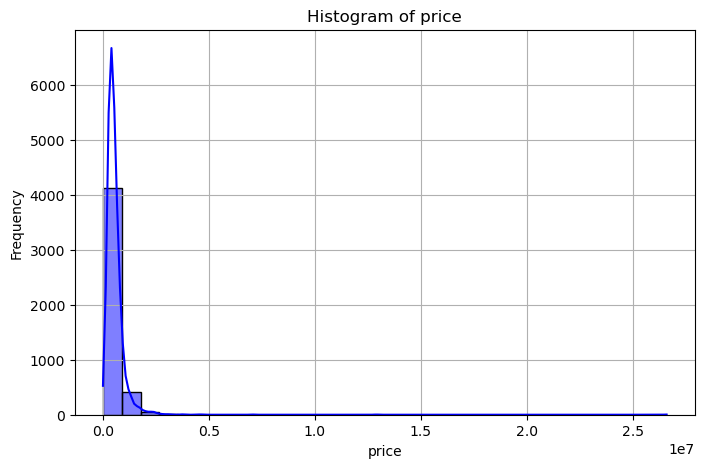

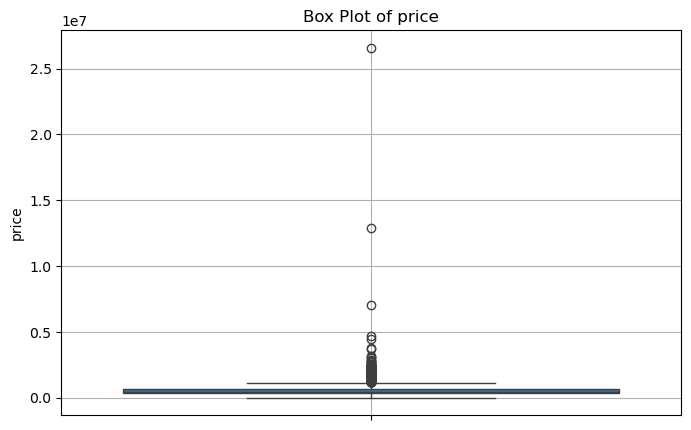

Value counts for 'price':
price
0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: count, Length: 1741, dtype: int64



In [ ]:
uni = UnivarientAnalyzer(clean_data)
uni.analyze('price')

# Bivariate Analysis



Analyzing numeric-numeric: scatter plot of price vs bedrooms


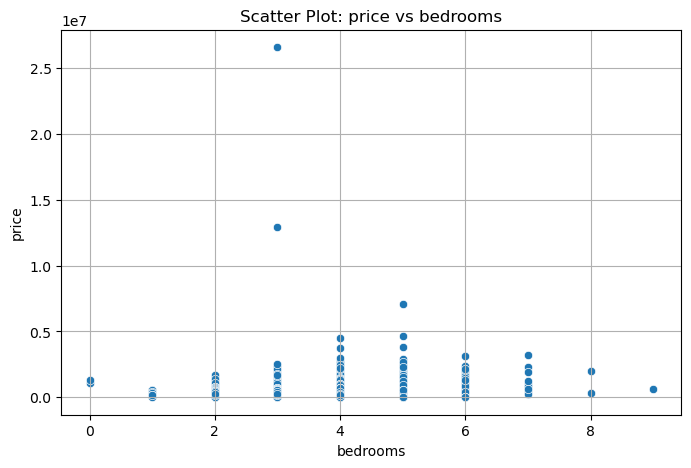

In [ ]:
bi = BivariateAnalyzer(clean_data)
bi.analyze('bedrooms', 'price')  


# Split the data

In [ ]:
splitter = DataSplitter(clean_data, target_column='price')  
X_train, X_test, y_train, y_test = splitter.split()


# Train and Evaluate the Model

In [ ]:
from sklearn.svm import SVR

model = SVR()
trainer = ModelTrainer(model)
trainer.train_and_evaluate(X_train, X_test, y_train, y_test)


✅ Task: Regression

📉 Mean Squared Error: 1033520298824.21
📈 Mean Absolute Error: 267404.14
🧠 R² Score: -0.01
